In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

##### Load data

In [2]:
df = pd.read_csv(r'.\202401-bluebikes-tripdata.csv')
print("For the month of January 2024, there are {} rides.".format(df.shape[0]))

For the month of January 2024, there are 166699 rides.


##### Select trips that have either start or end stations in Cambridge

In [3]:
# Function to check if the station ID starts with M
def check_station_id(station_id):
    if isinstance(station_id, str) and station_id.startswith('M'):
        return True
    return False

# Filter rows based on the criteria for start_station_id or end_station_id
cambridge_df = df[df.apply(lambda row: check_station_id(row['start_station_id']) or check_station_id(row['end_station_id']), axis=1)].copy()
print("Out of these, {} rides were from or to a station in Cambridge.".format(cambridge_df.shape[0]))
cambridge_df.head(5)

Out of these, 81439 rides were from or to a station in Cambridge.


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,D2F4A4783B230A84,electric_bike,2024-01-31 12:16:49,2024-01-31 12:21:02,Ames St at Main St,M32037,Central Square at Mass Ave / Essex St,M32011,42.362357,-71.088163,42.365070,-71.103100,member
1,D305CEFFD4558633,classic_bike,2024-01-12 08:14:16,2024-01-12 08:19:48,Ames St at Main St,M32037,Central Square at Mass Ave / Essex St,M32011,42.362500,-71.088220,42.365070,-71.103100,member
2,02009BB4EBA0D1F6,electric_bike,2024-01-29 15:00:05,2024-01-29 15:05:47,One Memorial Drive,M32053,Kennedy-Longfellow School 158 Spring St,M32065,42.361697,-71.080273,42.369553,-71.085790,member
3,04C230C1C39071F7,classic_bike,2024-01-09 16:33:40,2024-01-09 17:00:41,Ames St at Main St,M32037,Brookline Town Hall,K32005,42.362500,-71.088220,42.333765,-71.120464,member
6,F93AF0484FBA82B2,classic_bike,2024-01-23 12:50:25,2024-01-23 12:55:28,Ames St at Main St,M32037,Kennedy-Longfellow School 158 Spring St,M32065,42.362500,-71.088220,42.369553,-71.085790,member


##### Remove trips that start and end at the same station

In [4]:
cambridge_df = cambridge_df[cambridge_df['start_station_id'] != cambridge_df['end_station_id']]
cambridge_df.shape

(79785, 13)

##### Length of trips

In [5]:
# Convert the 'started_at' and 'ended_at' columns to datetime format
cambridge_df['started_at'] = pd.to_datetime(cambridge_df['started_at'])
cambridge_df['ended_at'] = pd.to_datetime(cambridge_df['ended_at'])

# Calculate the duration of each trip in minutes
cambridge_df['duration_minutes'] = (cambridge_df['ended_at'] - cambridge_df['started_at']).dt.total_seconds() / 60

# Remove any negative or zero durations, if they exist
cambridge_df = cambridge_df[cambridge_df['duration_minutes'] > 0]

# check how many rides were below half an hour, up to 2 hours, up to 8 hours and more than 8 hours.
bins = [0, 30, 60, 120, 480, 1440, 100000]
binned_data = pd.cut(cambridge_df['duration_minutes'], bins)
hist_as_series = binned_data.value_counts(sort = False).to_numpy()
print("{} trips between 0 and 30 minutes\n {} trips between 30 and 60 minutes\n {} trips between 1 and 2 hours\n {} trips between 2 and 8 hours\n {} trips longer than 8 hours".format(hist_as_series[0], hist_as_series[1], hist_as_series[2], hist_as_series[3], hist_as_series[4]))

76412 trips between 0 and 30 minutes
 2709 trips between 30 and 60 minutes
 309 trips between 1 and 2 hours
 185 trips between 2 and 8 hours
 105 trips longer than 8 hours


##### Trips by day of the month

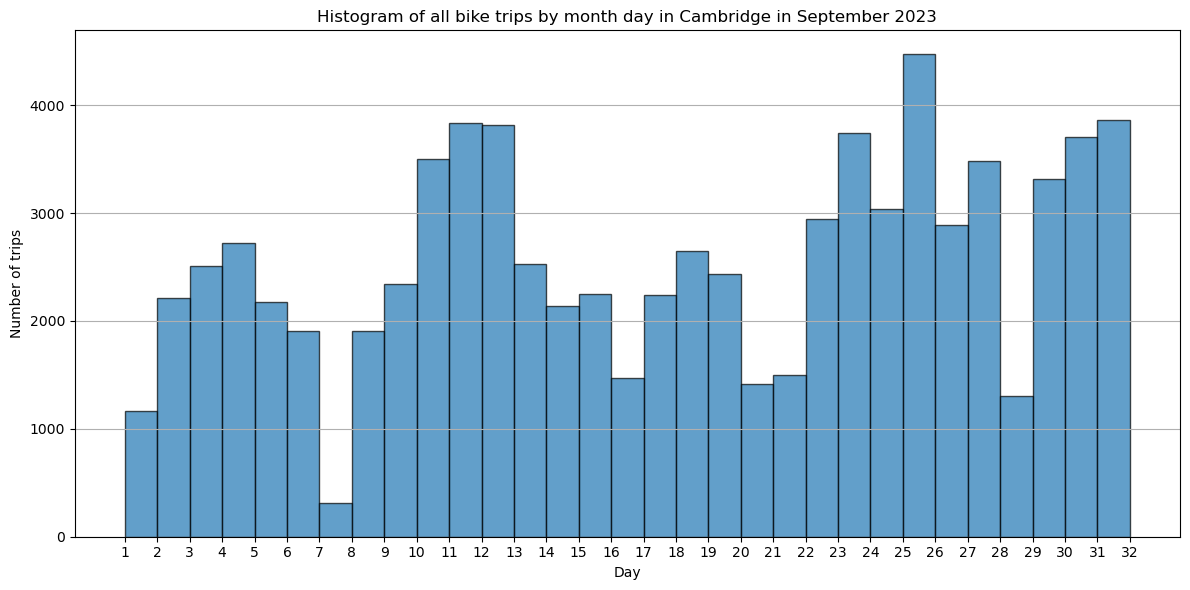

In [6]:
# Extract the day from the "started_at" column
cambridge_df['start_day'] = pd.to_datetime(cambridge_df['started_at']).dt.day

# Plot a histogram
plt.figure(figsize=(12, 6))
plt.hist(cambridge_df['start_day'], bins=range(1,33), edgecolor='black', alpha=0.7)
plt.title('Histogram of all bike trips by month day in Cambridge in September 2023')
plt.xlabel('Day')
plt.ylabel('Number of trips')
plt.xticks(range(1,33))
plt.grid(axis='y')
plt.tight_layout()

plt.show()

##### Filter rides that are on the same day

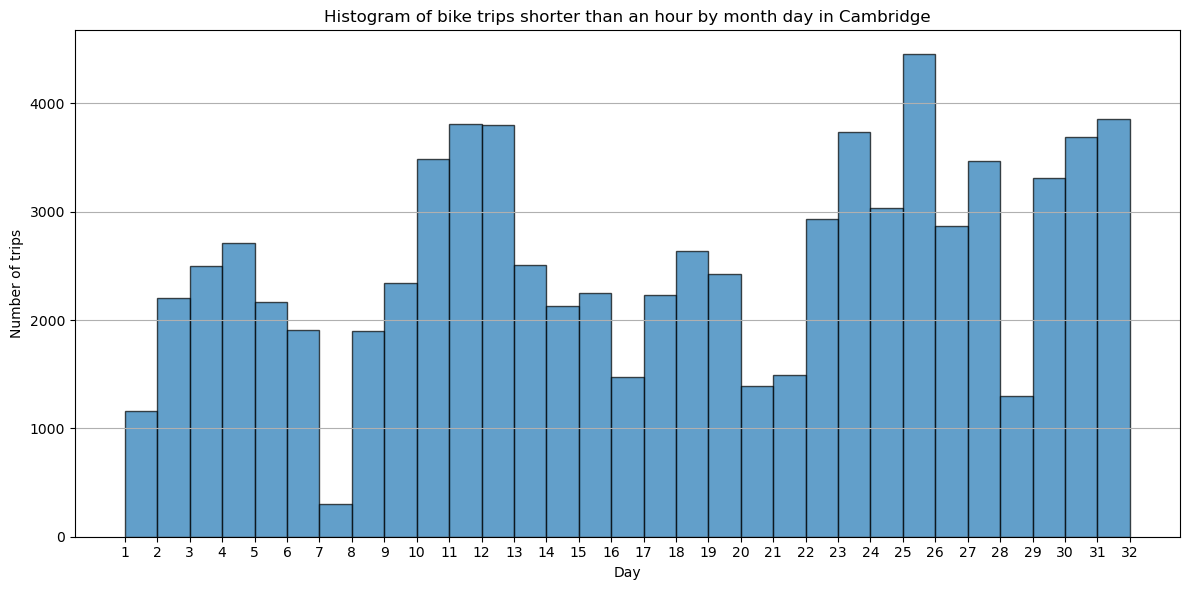

In [7]:
# Filter only trips that are on the same day
cambridge_df['end_day'] = pd.to_datetime(cambridge_df['ended_at']).dt.day
cambridge_df = cambridge_df[cambridge_df['start_day'] == cambridge_df['end_day']]


# Plot a histogram
plt.figure(figsize=(12, 6))
plt.hist(cambridge_df['start_day'], bins=range(1,33), edgecolor='black', alpha=0.7)
plt.title('Histogram of bike trips shorter than an hour by month day in Cambridge')
plt.xlabel('Day')
plt.ylabel('Number of trips')
plt.xticks(range(1,33))
plt.grid(axis='y')
plt.tight_layout()

plt.show()

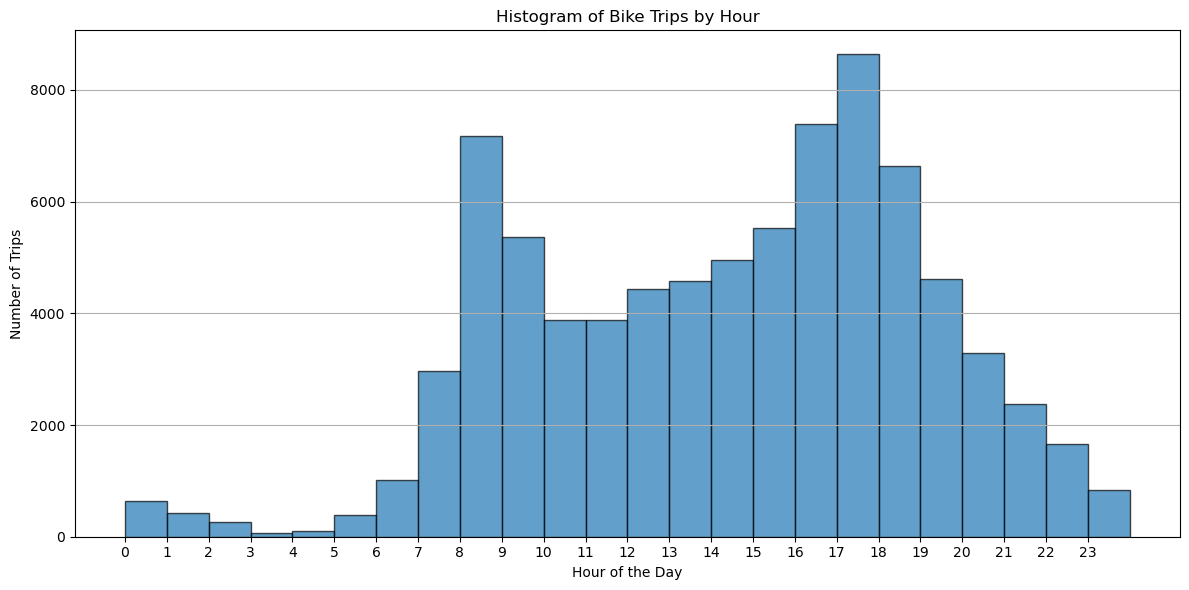

In [7]:
cambridge_short_trips_by_hour = pd.to_datetime(cambridge_df['started_at']).dt.hour

# Plot a histogram
plt.figure(figsize=(12, 6))
plt.hist(cambridge_short_trips_by_hour, bins=range(25), edgecolor='black', alpha=0.7)
plt.title('Histogram of Bike Trips by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.grid(axis='y')
plt.tight_layout()

plt.show()

##### Drop columns that aren't needed

In [8]:
cambridge_df.rename(columns= {'started_at': 'startTime', 'ended_at': 'endTime', 'start_station_id': 'startStationId', 'end_station_id': 'endStationId', 'start_lat': 'startLat', 'start_lng': 'startLng', 'end_lat': 'endLat', 'end_lng': 'endLng'}, inplace=True)
cambridge_df.drop(columns=['member_casual', 'start_day', 'end_day', 'rideable_type', 'ride_id', 'start_station_name', 'end_station_name', 'duration_minutes'], inplace=True)
cambridge_df

,startTime,endTime,startStationId,endStationId,startLat,startLng,endLat,endLng
0,2024-01-31 12:16:49,2024-01-31 12:21:02,M32037,M32011,42.362357,-71.088163,42.365070,-71.103100
1,2024-01-12 08:14:16,2024-01-12 08:19:48,M32037,M32011,42.362500,-71.088220,42.365070,-71.103100
2,2024-01-29 15:00:05,2024-01-29 15:05:47,M32053,M32065,42.361697,-71.080273,42.369553,-71.085790
3,2024-01-09 16:33:40,2024-01-09 17:00:41,M32037,K32005,42.362500,-71.088220,42.333765,-71.120464
6,2024-01-23 12:50:25,2024-01-23 12:55:28,M32037,M32065,42.362500,-71.088220,42.369553,-71.085790
...,...,...,...,...,...,...,...,...
166671,2024-01-12 21:23:01,2024-01-12 21:44:27,M32027,S32036,42.366088,-71.086336,42.391898,-71.097454
166682,2024-01-08 20:03:18,2024-01-08 20:13:58,M32071,D32038,42.360882,-71.085494,42.374878,-71.063835
166684,2024-01-14 19:18:22,2024-01-14 19:30:29,M32027,S32036,42.365984,-71.086325,42.391898,-71.097454
166691,2024-01-23 17:08:17,2024-01-23 17:28:40,M32071,S32036,42.360920,-71.085454,42.391898,-71.097454


##### Filter rides for the 1st of September

In [42]:
cambridge_trips_0101 = cambridge_short_trips_df[cambridge_short_trips_df['start_day'] == 1].copy()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,duration_minutes
527,2024-01-01 01:14:16,2024-01-01 01:39:09,42.371977,-71.072005,42.365673,-71.064263,24.883333
687,2024-01-01 00:51:12,2024-01-01 00:57:34,42.365070,-71.103100,42.364263,-71.118276,6.366667
711,2024-01-01 21:48:19,2024-01-01 21:57:31,42.373268,-71.118579,42.364263,-71.118276,9.200000
942,2024-01-01 18:16:18,2024-01-01 18:25:55,42.362131,-71.091156,42.365070,-71.103100,9.616667
943,2024-01-01 15:21:41,2024-01-01 15:30:40,42.362131,-71.091156,42.365070,-71.103100,8.983333
...,...,...,...,...,...,...,...
166108,2024-01-01 14:16:00,2024-01-01 14:17:02,42.362242,-71.083111,42.363045,-71.082871,1.033333
166332,2024-01-01 10:02:13,2024-01-01 10:05:23,42.360542,-71.086698,42.363045,-71.082871,3.166667
166531,2024-01-01 02:16:35,2024-01-01 02:26:26,42.386748,-71.119019,42.383709,-71.099830,9.850000
166550,2024-01-01 02:16:47,2024-01-01 02:26:37,42.386748,-71.119019,42.383709,-71.099830,9.833333


##### Sort values by start time

In [9]:
cambridge_df.sort_values(by='startTime', inplace=True)
cambridge_df

,startTime,endTime,startStationId,endStationId,startLat,startLng,endLat,endLng
112262,2024-01-01 00:04:13,2024-01-01 00:25:31,F32003,M32030,42.401697,-71.106128,42.361780,-71.108100
70860,2024-01-01 00:05:08,2024-01-01 00:23:10,S32019,M32013,42.396387,-71.120113,42.373379,-71.111075
101719,2024-01-01 00:08:14,2024-01-01 00:16:30,M32016,S32004,42.372217,-71.121881,42.383639,-71.108537
108957,2024-01-01 00:13:03,2024-01-01 00:18:40,M32012,M32052,42.366426,-71.105495,42.371197,-71.097599
108959,2024-01-01 00:13:45,2024-01-01 00:18:39,M32012,M32052,42.366426,-71.105495,42.371197,-71.097599
...,...,...,...,...,...,...,...,...
95816,2024-01-31 23:30:29,2024-01-31 23:49:45,M32073,B32005,42.368952,-71.109988,42.343666,-71.085824
53363,2024-01-31 23:36:52,2024-01-31 23:48:56,M32076,M32083,42.357662,-71.108413,42.369036,-71.086310
7805,2024-01-31 23:39:00,2024-01-31 23:43:11,M32062,M32067,42.374267,-71.100265,42.372077,-71.089954
7884,2024-01-31 23:42:14,2024-01-31 23:50:21,S32034,M32029,42.379273,-71.103419,42.387995,-71.119084


#####  Remove all null values for geometry

In [15]:
cambridge_df = cambridge_df.dropna(subset=['endLat', 'startLat', 'endLng', 'startLng', 'endStationId', 'startStationId'])
cambridge_df[cambridge_df['endStationId'].isnull()]

,startTime,endTime,startStationId,endStationId,startLat,startLng,endLat,endLng


In [16]:
cambridge_df[cambridge_df['startStationId'].isnull()]

,startTime,endTime,startStationId,endStationId,startLat,startLng,endLat,endLng


##### Export bike trip data

In [17]:
cambridge_df.to_csv("202401-tripdata-cambridge.csv", index=False)

In [11]:
cambridge_df

,startTime,endTime,startStationId,endStationId,startLat,startLng,endLat,endLng
112262,2024-01-01 00:04:13,2024-01-01 00:25:31,F32003,M32030,42.401697,-71.106128,42.361780,-71.108100
70860,2024-01-01 00:05:08,2024-01-01 00:23:10,S32019,M32013,42.396387,-71.120113,42.373379,-71.111075
101719,2024-01-01 00:08:14,2024-01-01 00:16:30,M32016,S32004,42.372217,-71.121881,42.383639,-71.108537
108957,2024-01-01 00:13:03,2024-01-01 00:18:40,M32012,M32052,42.366426,-71.105495,42.371197,-71.097599
108959,2024-01-01 00:13:45,2024-01-01 00:18:39,M32012,M32052,42.366426,-71.105495,42.371197,-71.097599
...,...,...,...,...,...,...,...,...
95816,2024-01-31 23:30:29,2024-01-31 23:49:45,M32073,B32005,42.368952,-71.109988,42.343666,-71.085824
53363,2024-01-31 23:36:52,2024-01-31 23:48:56,M32076,M32083,42.357662,-71.108413,42.369036,-71.086310
7805,2024-01-31 23:39:00,2024-01-31 23:43:11,M32062,M32067,42.374267,-71.100265,42.372077,-71.089954
7884,2024-01-31 23:42:14,2024-01-31 23:50:21,S32034,M32029,42.379273,-71.103419,42.387995,-71.119084
